RESUMEN

Objetivo del Informe:

Este informe surge como respuesta a las crisis financieras de 2008 y 1930, con la finalidad de identificar variables clave presentes en dichos eventos y proporcionar insights para prever futuras crisis.

Contexto Comercial:

La crisis financiera de 2008 dejó una huella profunda a nivel global, impactando a diversos países de manera variable. Este análisis se focaliza en bancos "serios" (comerciales e de inversión), con el propósito de evitar posibles quiebras. Los interesados incluyen inversores, titulares de capitales como fondos de pensión y empresas que colocan sus excedentes en fondos comunes de inversión. Sin embargo, a menudo, estos actores carecen de información privilegiada. Aquí surge la necesidad de una "agencia calificadora de riesgos para los depositantes/ahorradores/jubilados", un asesor independiente que proporcione información directa sobre sus tenencias. Este enfoque, aunque desafiante en términos regulatorios, busca llenar un vacío en el servicio de asesoramiento financiero.

Problema Comercial:

En crisis financieras, se tiende a pasar por alto ciertos indicios, y las agencias calificadoras de riesgos a menudo favorecen los intereses de los fondos o bancos en lugar de los depositantes reales. Aquí, se propone una plataforma de base de datos que notifique posibles quiebras, crisis y ofrezca información relevante, personalizada para cada individuo. Este servicio se distancia de la complejidad de plataformas como Bloomberg y busca una alternativa más accesible para el público en general, planteando que plataformas como investing.com y Yahoo Finance pueden cumplir con esta necesidad.

Solución Propuesta:

La propuesta inicial se centra en la creación de una plataforma que traduzca de manera clara las variables a analizar, proporcionando análisis de datos accesibles para una audiencia más amplia. Se busca simplificar la comprensión de información financiera crítica y brindar a los depositantes, ahorradores y jubilados un asesoramiento directo, independiente de los intereses bancarios o financieros tradicionales. Aunque se reconocen los desafíos regulatorios, se apunta a crear una herramienta que empodere a los individuos en la toma de decisiones financieras informadas. Este enfoque refleja la evolución de las plataformas de inversión hacia una mayor accesibilidad y comprensión para el ciudadano común.



In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
#DATASET 1
import pandas as pd
df=pd.read_csv('/content/gdrive/MyDrive/CODER DATA SCIENCE/bankrupcy.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

HIPÓTESIS DE INVESTIGACIÓN

1. Relación entre Retorno sobre activo total y Dependencia de Préstamos:
Se plantea la hipótesis de que existe una relación entre el Retorno sobre Activo Total y la Dependencia de Préstamos. La premisa sugiere que la rentabilidad de una entidad financiera podría estar vinculada a su nivel de endeudamiento, explorando así la posible interacción entre la eficiencia operativa (medida por el Retorno sobre Activo Total) y la necesidad de financiamiento externo.

2. Relación entre el Ratio de Gasto en Intereses y el Ratio de Deuda:
La hipótesis plantea que hay una relación entre el Ratio de Gasto en Intereses (Interest Expense Ratio) y el Ratio de Deuda. Se espera investigar cómo los costos asociados al endeudamiento (Gasto en Intereses) se correlacionan con el nivel general de endeudamiento de una entidad. La pregunta central es si el manejo eficiente de la deuda se refleja en un menor gasto en intereses.

3. Relación entre el Ratio de Deuda y la Bancarrota:
La hipótesis sostiene que existe una relación significativa entre el Ratio de Deuda y la probabilidad de bancarrota. Se busca evaluar si entidades con niveles más altos de endeudamiento están más propensas a enfrentar situaciones de crisis financiera o quiebra. La investigación explorará cómo la carga financiera afecta la estabilidad a largo plazo de una entidad.

Estas hipótesis se formulan con la intención de explorar relaciones cruciales en el ámbito financiero, proporcionando una base sólida para el análisis y la interpretación de datos financieros. La validación o refutación de estas hipótesis contribuirá a una comprensión más profunda de las interrelaciones entre variables clave en el sector financiero.


In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm


In [5]:
df.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
#Una de mis principales variables a analizar es la Dependencia del Préstamo (Borrowing dependency)
df[" Borrowing dependency"].describe()

count    6819.000000
mean        0.374654
std         0.016286
min         0.000000
25%         0.370168
50%         0.372624
75%         0.376271
max         1.000000
Name:  Borrowing dependency, dtype: float64

La Media y Desvío son los parámetros, 0.37465 y 0.016286.

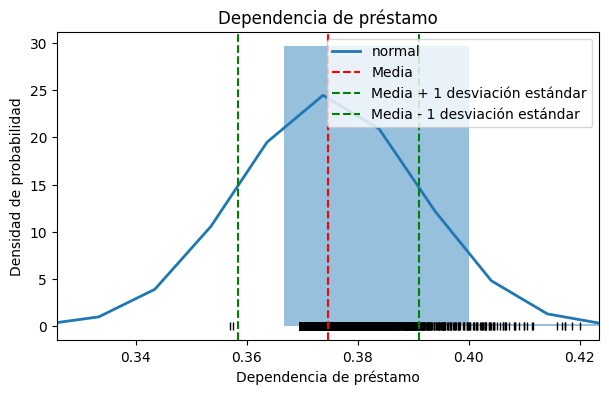

In [7]:
#A continuación hago un gráfico de la variable sin aplicarle ningún logaritmo ni transformación para saber si la variable puede distribuirse de manera normal.
mu, sigma = stats.norm.fit(df[" Borrowing dependency"])

# Valores teóricos de la normal en el rango observado
x_hat = np.linspace(min(df[" Borrowing dependency"]), max(df[" Borrowing dependency"]), num=100)
y_hat = stats.norm.pdf(x_hat, mu, sigma)

# Gráfico
fig, ax = plt.subplots(figsize=(7,4))
ax.plot(x_hat, y_hat, linewidth=2, label='normal')
ax.hist(x=df[" Borrowing dependency"], density=True, bins=30, color="#3182bd", alpha=0.5)
ax.plot(df[" Borrowing dependency"], np.full_like(df[" Borrowing dependency"], -0.01), '|k', markeredgewidth=1)

ax.axvline(mu, color='red', linestyle='--', label='Media')
ax.axvline(mu + sigma, color='green', linestyle='--', label='Media + 1 desviación estándar')
ax.axvline(mu - sigma, color='green', linestyle='--', label='Media - 1 desviación estándar')

ax.set_xlim(mu -3*sigma, mu + 3*sigma)  # Establecer límites en el eje x

ax.set_title('Dependencia de préstamo')
ax.set_xlabel('Dependencia de préstamo')
ax.set_ylabel('Densidad de probabilidad')
ax.legend();

In [8]:
mu, sigma

(0.37465429459872324, 0.01628496913637103)

A simple vista parece ser que nuestra variable sigue una distribución normal. Para verificarla haremos un test de normalidad. Para ello hay varias maneras: una de ellas es ver si el plot de los datos se ajustan a una recta de 45 grados.

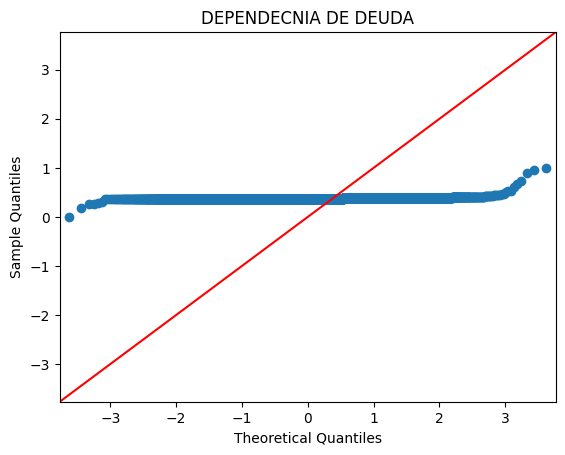

In [9]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm

fig = sm.qqplot(df[" Borrowing dependency"], line="45")
plt.title("DEPENDECNIA DE DEUDA" )

plt.show()

In [10]:
shapiro_test = stats.shapiro(df[" Borrowing dependency"])
shapiro_test

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.18964773416519165, pvalue=0.0)

El "valor p" es nulo por lo que la variable Dependencia de Préstamo, técnicamente no sigue una distribución normal.

Vamos a realizar el test de todas las variables. Del dataset la variable bankrupt? es categórica, así que no merece análisis de su valor p.

In [11]:
# Test de normalidad de todas las variables de df

for column in df:
    print("Shapiro-Wilk test for normality for column",column)
    print(stats.shapiro(df[column]))


Shapiro-Wilk test for normality for column Bankrupt?
ShapiroResult(statistic=0.16721117496490479, pvalue=0.0)
Shapiro-Wilk test for normality for column  ROA(C) before interest and depreciation before interest
ShapiroResult(statistic=0.9366025924682617, pvalue=0.0)
Shapiro-Wilk test for normality for column  ROA(A) before interest and % after tax
ShapiroResult(statistic=0.8948597311973572, pvalue=0.0)
Shapiro-Wilk test for normality for column  ROA(B) before interest and depreciation after tax
ShapiroResult(statistic=0.9180132746696472, pvalue=0.0)
Shapiro-Wilk test for normality for column  Operating Gross Margin
ShapiroResult(statistic=0.6064841747283936, pvalue=0.0)
Shapiro-Wilk test for normality for column  Realized Sales Gross Margin
ShapiroResult(statistic=0.6053833365440369, pvalue=0.0)
Shapiro-Wilk test for normality for column  Operating Profit Rate
ShapiroResult(statistic=0.00727921724319458, pvalue=0.0)
Shapiro-Wilk test for normality for column  Pre-tax net Interest Rate
S

/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


Como se puede apreciar en el primer gráfico al principio los datos de la columna dependencia de préstamo parece tener una distribución normal. Luego para probar con un 2do método visual más riguroso se realiza un gráfico de puntos con su respectiva recta 45 grados, al no ajustarse la nube de puntos a la recta no sigue una distibución normal. En 3er lugar se realiza el test de shapiro dando un valor p nulo y efectivamente no sigue una distribución normal.

La hipótesis nula plantea que se distribuye normalmente, y al ser el valor p nulo, no hay probabilidad sufuciente para aceptar la hipotesis nula.

Solo una variable "Net Income Flag" sigue una distrinución normal.

A continuación se normaliza las variables para poder trabajar con ellas y llegar a conclusiones válidas.

In [12]:
# Normalizar el dataframe excepto una variable

df_norm = df.copy()
for column in df.columns:
  if column != 'Bankrupt':
    df_norm[column] = (df_norm[column] - df_norm[column].mean()) / df_norm[column].std()


In [13]:
for column in df:
    print("Shapiro-Wilk test for normality for column",column)
    print(stats.shapiro(df_norm[column]))

Shapiro-Wilk test for normality for column Bankrupt?
ShapiroResult(statistic=0.16721117496490479, pvalue=0.0)
Shapiro-Wilk test for normality for column  ROA(C) before interest and depreciation before interest
ShapiroResult(statistic=0.9366025924682617, pvalue=0.0)
Shapiro-Wilk test for normality for column  ROA(A) before interest and % after tax
ShapiroResult(statistic=0.8948599100112915, pvalue=0.0)
Shapiro-Wilk test for normality for column  ROA(B) before interest and depreciation after tax
ShapiroResult(statistic=0.9180130958557129, pvalue=0.0)
Shapiro-Wilk test for normality for column  Operating Gross Margin
ShapiroResult(statistic=0.6064842939376831, pvalue=0.0)
Shapiro-Wilk test for normality for column  Realized Sales Gross Margin
ShapiroResult(statistic=0.6053833365440369, pvalue=0.0)
Shapiro-Wilk test for normality for column  Operating Profit Rate
ShapiroResult(statistic=0.007279157638549805, pvalue=0.0)
Shapiro-Wilk test for normality for column  Pre-tax net Interest Rate



Después de realizar los tests de normalidad, se destaca que únicamente una variable, Net Income Flag, sigue una distribución normal. Este hallazgo evoca la reflexión expresada por Emilio Ocampo en su obra "La Era de la Burbuja" (Editorial Claridad, 2009), donde sostiene que, en términos financieros, la normalidad es una ilusión. En la página 131, Ocampo señala que atributos como altura, peso y coeficiente intelectual pueden seguir una distribución normal con parámetros mu y sigma, pero esta tendencia no se traduce de manera directa al ámbito financiero.

En el contexto de las finanzas, el autor hace referencia a la falta de normalidad al destacar que la crisis económica y las fluctuaciones del mercado desafían la idea de una distribución predecible y equitativa. Específicamente, Ocampo menciona el uso de modelos como la Cópula Gaussiana o el Modelo de Cópula Normal para estimar la correlación de incumplimientos entre diferentes activos financieros a lo largo del tiempo, especialmente en el mercado de CDOs (Obligaciones de Deuda Colateralizada). A su vez, compara este enfoque con la conocida fórmula Black-Scholes, utilizada en el mercado de opciones.

La Cópula Gaussiana, o Modelo de Cópula Normal, es una herramienta estadística avanzada que une las distribuciones de probabilidad individuales de varias variables a una distribución de probabilidad conjunta. Este modelo ha sido empleado en contextos financieros para comprender las interrelaciones entre diferentes instrumentos financieros y evaluar el riesgo de manera más precisa.

Sin embargo, a pesar de la relevancia de la Cópula Gaussiana en ciertos ámbitos financieros, se señala que, por motivos que exceden el alcance del curso de data science en cuestión, no se aplicará este modelo. Esta decisión, aunque puede dejar ciertas interrogantes, subraya la complejidad y las limitaciones prácticas de ciertos enfoques estadísticos, resaltando la importancia de la contextualización y la prudencia en la aplicación de modelos avanzados en el análisis de datos financieros.

En resumen, la reflexión de Ocampo sobre la falta de normalidad en las finanzas y la breve alusión a la Cópula Gaussiana ofrecen una perspectiva valiosa y contextualizada, enriqueciendo el análisis de los datos y subrayando la necesidad de considerar cuidadosamente los modelos estadísticos en función del contexto y los objetivos específicos.



A continuación se continua analizando variables como, el ratio de tasa de interés, ratio de deuda, según si están en bancarota o no.

In [14]:
import math
import numpy as np
from scipy.stats import shapiro
from scipy.stats import lognorm

In [15]:
df[" Interest Expense Ratio"].describe()


count    6819.000000
mean        0.630991
std         0.011238
min         0.000000
25%         0.630612
50%         0.630698
75%         0.631125
max         1.000000
Name:  Interest Expense Ratio, dtype: float64

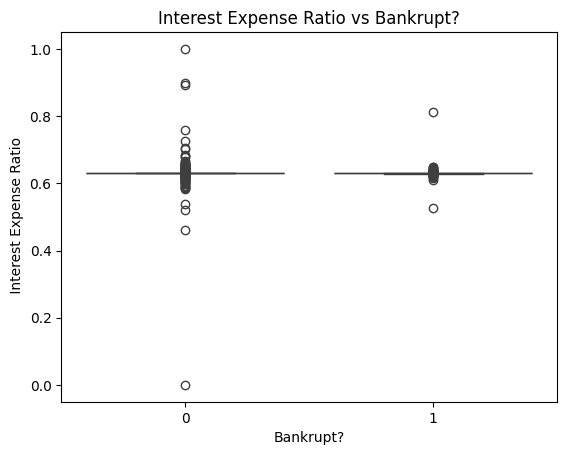

In [16]:
sns.boxplot(x='Bankrupt?', y = " Interest Expense Ratio", data = df)
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("Interest Expense Ratio vs Bankrupt?" );
#GRÁFICO 5

In [17]:
df[" Debt ratio %"].describe()

count    6819.000000
mean        0.113177
std         0.053920
min         0.000000
25%         0.072891
50%         0.111407
75%         0.148804
max         1.000000
Name:  Debt ratio %, dtype: float64

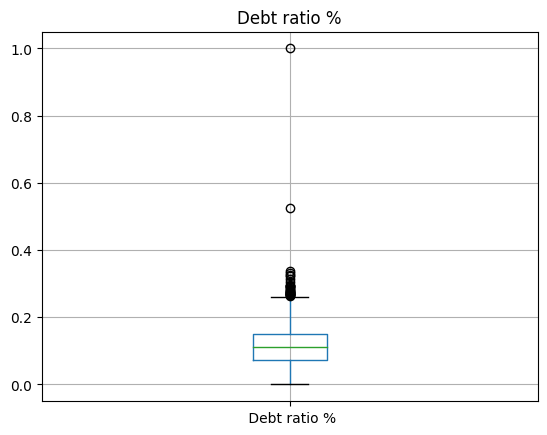

In [18]:
df.boxplot(column =" Debt ratio %")
plt.title("Debt ratio %" );

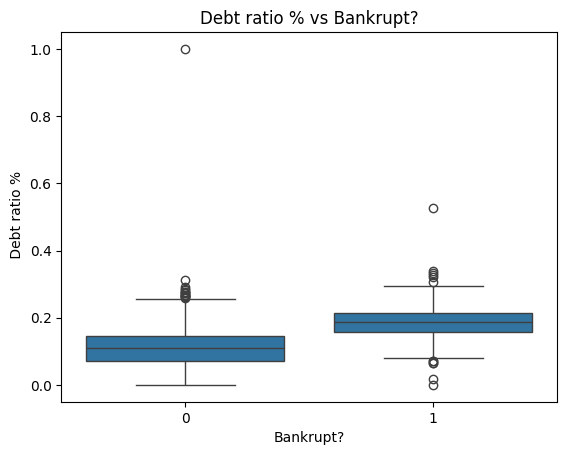

In [19]:
sns.boxplot(x='Bankrupt?', y = ' Debt ratio %', data = df)
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("Debt ratio % vs Bankrupt?" );
#GRÁFICO 4

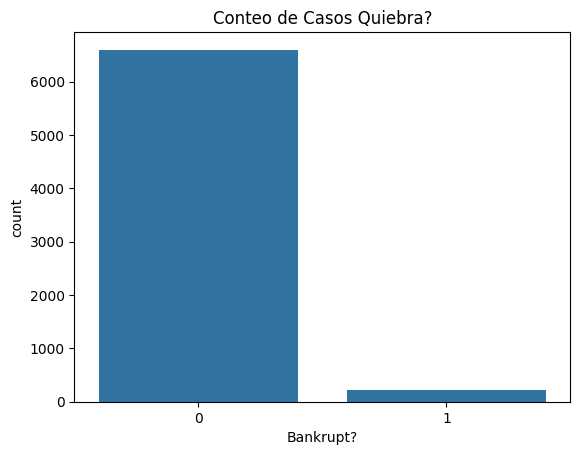

In [20]:
sns.countplot(df, x="Bankrupt?")
plt.title("Conteo de Casos Quiebra?" );

In [21]:
df["Bankrupt?"].value_counts()

Bankrupt?
0    6599
1     220
Name: count, dtype: int64

De los dos resúmenes estadísticos analizados, se desprende una revelación crucial sobre la salud financiera de las entidades bajo escrutinio. En primer lugar, destaca la alta magnitud de los ratios de gastos en intereses, registrando un promedio de 0,63. Aunque no se observa una disparidad significativa entre los grupos de entidades quebradas y las que no lo están, este indicador revela una dimensión de preocupación común en ambos casos.

La disparidad entre los dos conjuntos se hace evidente al examinar el ratio de deuda. Este factor emerge como el punto de inflexión que diferencia de manera notable a los dos grupos. Se puede aventurar la hipótesis inicial de que las entidades con deudas abultadas son más propensas a la quiebra. Para visualizar esta relación, se presenta un gráfico de caja y bigotes titulado "Debt ratio % vs Bankrupt?". Este revelador gráfico indica que las instituciones que han sucumbido a la bancarrota han acumulado deudas sustancialmente superiores (ubicadas en el intervalo del 50% al 75% y más allá) en comparación con aquellas que han eludido tal destino. La mediana de las entidades en bancarrota supera notablemente a la mediana de aquellas que han logrado mantenerse a flote.

El análisis culmina con un impactante hallazgo al examinar el número de casos de quiebra en relación con las entidades no quebradas. Se registra un total de 220 casos de quiebra, frente a una abrumadora mayoría de 6599 entidades que han eludido tal destino. Este contraste dramático resalta la magnitud de la crisis financiera que aqueja a las entidades en quiebra, agravada por la impresionante acumulación de deudas. La dimensión asombrosa de las deudas en los casos de quiebra es aún más impactante cuando se considera que las 6599 entidades solventes han mantenido una concentración relativa en sus niveles de endeudamiento.

En resumen, estos análisis no solo subrayan la importancia crítica del ratio de deuda como indicador de riesgo financiero, sino que también arrojan luz sobre la grave situación de las entidades que han sucumbido a la bancarrota. Este enfoque analítico, respaldado por gráficos reveladores, proporciona una visión más completa y detallada de la relación entre la deuda y la quiebra, ofreciendo valiosos insights para la toma de decisiones financieras y estratégicas.



A continuación de analizará las correlaciones entre las distintas variables:

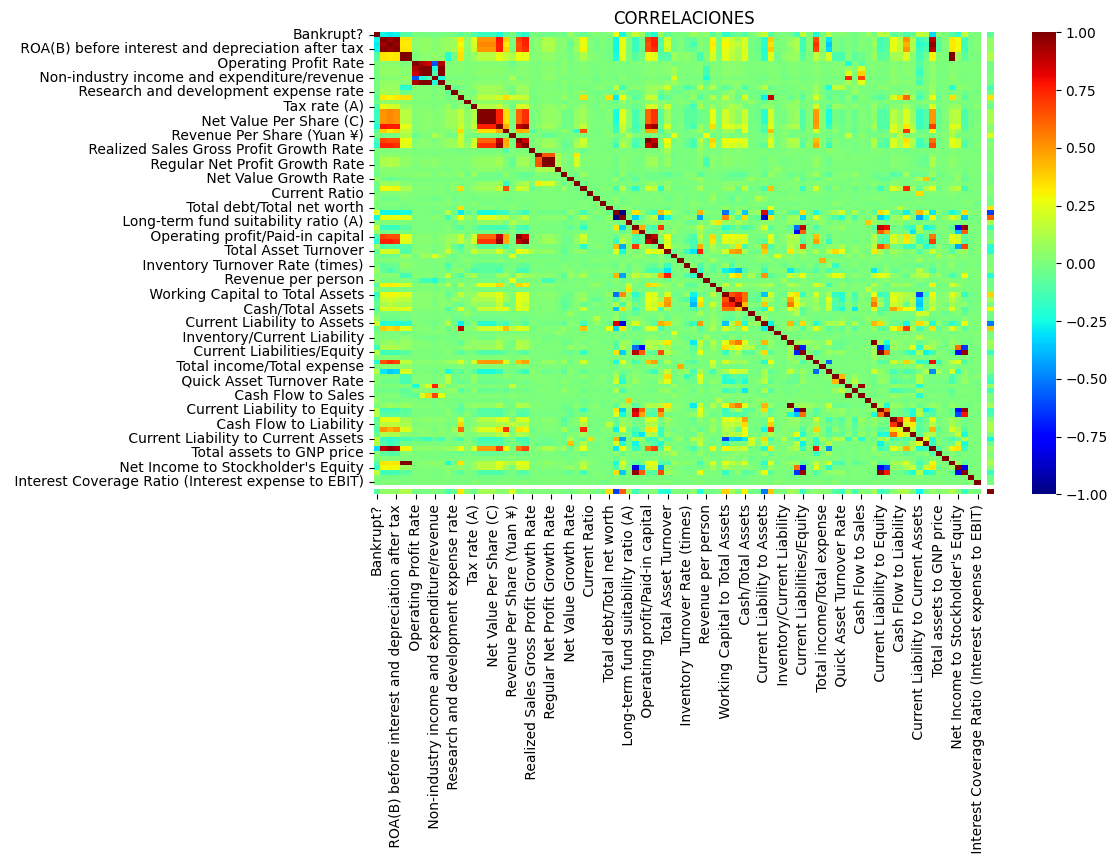

In [22]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df.corr(), cmap='jet')
plt.title("CORRELACIONES" );


In [23]:
def parejas(df):
    '''Obtiene diagonal inferior de parejas en matriz de correlacion'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def correlaciones(data, n=5):
    au_corr = data.corr().abs().unstack()
    labels_to_drop = parejas(data)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Correlaciones mas grandes")
print(correlaciones(df, 10)) # Saquemos el top 10
#TOP CORRELACIONES

Correlaciones mas grandes
 Current Liabilities/Liability         Current Liability to Liability      1.000000
 Current Liabilities/Equity            Current Liability to Equity         1.000000
 Debt ratio %                          Net worth/Assets                    1.000000
 Operating Gross Margin                Gross Profit to Sales               1.000000
 Net Value Per Share (A)               Net Value Per Share (C)             0.999837
 Operating Gross Margin                Realized Sales Gross Margin         0.999518
 Realized Sales Gross Margin           Gross Profit to Sales               0.999518
 Net Value Per Share (B)               Net Value Per Share (A)             0.999342
                                       Net Value Per Share (C)             0.999179
 Operating Profit Per Share (Yuan ¥)   Operating profit/Paid-in capital    0.998696
dtype: float64


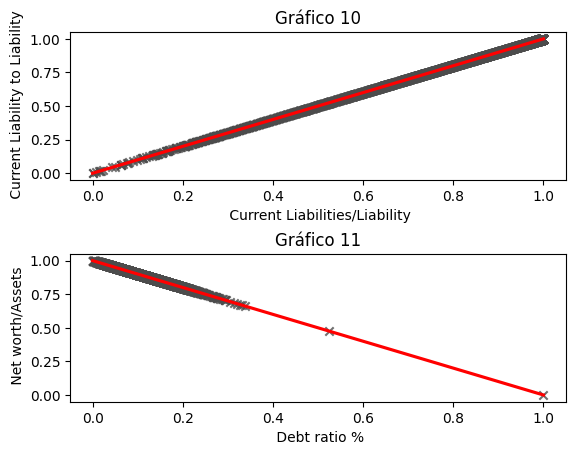

In [24]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
sns.regplot(
    data=df, x=" Current Liabilities/Liability", y=" Current Liability to Liability",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)
ax1.set_title('Gráfico 10')

ax2 = fig.add_subplot(2, 1, 2)
sns.regplot(
    data=df, x=" Debt ratio %", y=" Net worth/Assets",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)
ax2.set_title('Gráfico 11')

plt.subplots_adjust(hspace=0.5)

plt.show()

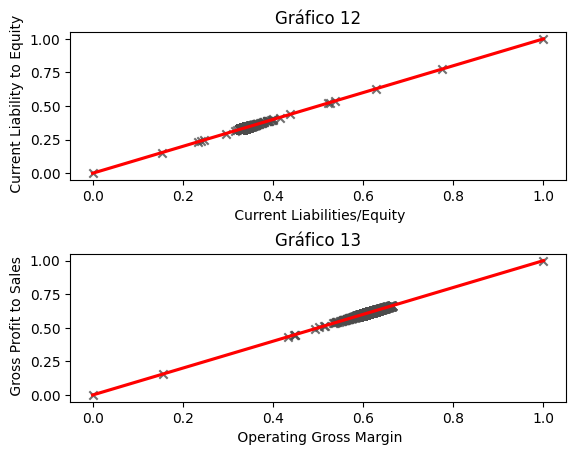

In [25]:
fig = plt.figure()

ax1 = fig.add_subplot(2, 1, 1)
sns.regplot(
    data=df, x=" Current Liabilities/Equity", y=" Current Liability to Equity",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)
ax1.set_title('Gráfico 12')

ax2 = fig.add_subplot(2, 1, 2)
sns.regplot(
    data=df, x=" Operating Gross Margin", y=" Gross Profit to Sales",
    ci=99, marker="x", color=".3", line_kws=dict(color="r"),
)
ax2.set_title('Gráfico 13')

plt.subplots_adjust(hspace=0.5)

plt.show()

Las correlaciones más significativas dentro del conjunto de datos se observan entre diversas variables financieras, revelando relaciones fundamentales entre ellas:

Pasivo Corriente y Pasivo (1.000000): La relación perfecta de 1.000000 entre Pasivo Corriente y el Pasivo total es intuitiva, ya que el Pasivo Corriente constituye una parte integral del Pasivo total. Dicha correlación refleja la composición estructural y la interdependencia inherente entre estos dos componentes.

Pasivo Corriente y Patrimonio Neto (1.000000): La correlación completa entre el Pasivo Corriente y el Patrimonio Neto merece un análisis más profundo desde una perspectiva contable. Mientras que el Pasivo Corriente representa las obligaciones a corto plazo, el Patrimonio Neto constituye los recursos propios de la empresa. Esta correlación total puede sugerir alguna relación conceptual entre estas variables, aunque la interpretación precisa podría requerir una revisión detallada de los registros contables.

Ratio de Deuda Capital Propio/Activos (1.000000): La correlación perfecta aquí señala una relación inversa entre el Ratio de Deuda Capital Propio/Activos y el Patrimonio Neto/Activos. Este hallazgo es consistente con la lógica financiera, ya que la deuda y el patrimonio neto juntos forman los activos totales. La visualización gráfica de esta relación inversa puede proporcionar una perspectiva más clara y detallada.

Margen Bruto Operativo y Beneficio Bruto sobre Ventas (1.000000): La correlación positiva entre el Margen Bruto Operativo y el Beneficio Bruto sobre Ventas indica una relación estrecha entre estos dos indicadores. Ambos cálculos se basan en los ingresos por ventas, sugiriendo una coherencia en la eficiencia operativa y la rentabilidad bruta de la empresa.

En conclusión, estas correlaciones no solo revelan asociaciones entre variables financieras clave, sino que también destacan la complejidad y la interconexión inherente en los estados financieros. Analizar visualmente estas relaciones a través de gráficos puede ofrecer una comprensión más profunda de los patrones y tendencias subyacentes en los datos financieros.



PRIMERAS CONCLUSIONES Y DESCUBRIMIENTOS NOTABLES EN EL ANÁLISIS FINANCIERO

En el inicio de nuestro análisis financiero, se revelan observaciones intrigantes que ofrecen una visión profunda de la situación:

Distribución de la Variable Dependencia de Préstamo:
La variable de dependencia de préstamo presenta una aparente desviación de la normalidad, desafiando la expectativa de una distribución gaussiana. Esta discrepancia enfatiza la complejidad de los datos financieros, donde las distribuciones no siempre se ajustan a modelos teóricos como la normalidad. En el ámbito financiero, la ausencia de normalidad es una realidad común, subrayando la necesidad de enfoques analíticos adaptados a la naturaleza específica de los datos.

Comparación entre Casos de Quiebra y No Quiebra:
Se identifican dos grupos distintos con 220 casos de quiebra y 6599 casos sin quiebra. Este claro contraste visual sugiere la presencia de clusters o grupos de datos separados. Para validar de manera más rigurosa estas diferencias, se contempla la aplicación de pruebas estadísticas de comparación de medias. Estos tests proporcionarán una evaluación cuantitativa de las disparidades observadas, permitiendo inferir si las diferencias son estadísticamente significativas.

Sobreapalancamiento y Endeudamiento:
Como primer indicio revelador, se destaca que aquellos que han experimentado quiebras muestran un nivel significativo de endeudamiento en relación con sus patrimonios netos. Esta observación apunta a la presencia de sobreapalancamiento, una condición financiera riesgosa donde el nivel de endeudamiento es excesivo en comparación con la capacidad de generar ingresos y afrontar las obligaciones. Este hallazgo es coherente con la literatura financiera, donde el sobreapalancamiento se considera un factor de riesgo crítico.

En este punto inicial, estas conclusiones sugieren áreas clave para una exploración más profunda. Las pruebas estadísticas adicionales y un análisis detallado de las variables pertinentes permitirán una comprensión más precisa de las relaciones y determinantes que subyacen en los datos financieros, brindando así una base sólida para futuras decisiones y estrategias.


## **DATA WRANGLIN**

In [26]:
df[df.duplicated()]

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability


No se aprecian datos duplicados

In [27]:
df.corr()


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
ROA(C) before interest and depreciation before interest,-0.260807,1.000000,0.940124,0.986849,0.334719,0.332755,0.035725,0.053419,0.049222,0.020501,...,0.887670,-0.071725,0.008135,0.334721,0.274287,-0.143629,-0.016575,0.010573,NaN,0.052416
ROA(A) before interest and % after tax,-0.282941,0.940124,1.000000,0.955741,0.326969,0.324956,0.032053,0.053518,0.049474,0.029649,...,0.961552,-0.098900,0.011463,0.326971,0.291744,-0.141039,-0.011515,0.013372,NaN,0.057887
ROA(B) before interest and depreciation after tax,-0.273051,0.986849,0.955741,1.000000,0.333749,0.331755,0.035212,0.053726,0.049952,0.022366,...,0.912040,-0.089088,0.007523,0.333750,0.280617,-0.142838,-0.014663,0.011473,NaN,0.056430
Operating Gross Margin,-0.100043,0.334719,0.326969,0.333749,1.000000,0.999518,0.005745,0.032493,0.027175,0.051438,...,0.300143,0.022672,0.004205,1.000000,0.075304,-0.085434,-0.011806,-0.001167,NaN,0.120029
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Degree of Financial Leverage (DFL),0.010508,-0.016575,-0.011515,-0.014663,-0.011806,-0.011268,0.000935,0.000855,0.000927,-0.000556,...,-0.010463,-0.001881,-0.008812,-0.011806,-0.000093,0.002119,1.000000,0.016513,NaN,-0.016739
Interest Coverage Ratio (Interest expense to EBIT),-0.005509,0.010573,0.013372,0.011473,-0.001167,-0.001158,0.000393,0.000984,0.000957,0.001024,...,0.012746,0.000239,0.001027,-0.001169,0.005147,0.001487,0.016513,1.000000,NaN,-0.008339
Net Income Flag,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Matriz de correlaciones

In [28]:
df.isnull().sum()


Bankrupt?                                                   0
 ROA(C) before interest and depreciation before interest    0
 ROA(A) before interest and % after tax                     0
 ROA(B) before interest and depreciation after tax          0
 Operating Gross Margin                                     0
                                                           ..
 Liability to Equity                                        0
 Degree of Financial Leverage (DFL)                         0
 Interest Coverage Ratio (Interest expense to EBIT)         0
 Net Income Flag                                            0
 Equity to Liability                                        0
Length: 96, dtype: int64

No tengo datos nullos

In [29]:
# Divido el dataframe original en 2 df distintos

df_no_bankrupt = df[df['Bankrupt?'] == 0]
df_bankrupt = df[df['Bankrupt?'] == 1]


In [30]:
#Acá veo los que están en bancarota, son todos los bankupt==1
df_bankrupt

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,1,0.418515,0.433984,0.461427,0.612750,0.612750,0.998864,0.796902,0.808857,0.302892,...,0.725750,0.000487,0.623730,0.612747,0.828067,0.292648,0.026666,0.564481,1,0.015620
6640,1,0.196802,0.211023,0.221425,0.598056,0.598056,0.998933,0.796144,0.808149,0.301423,...,0.519388,0.017588,0.623465,0.598051,0.856906,0.259280,0.026769,0.565052,1,0.003946
6641,1,0.337640,0.254307,0.378446,0.590842,0.590842,0.998869,0.796943,0.808897,0.302953,...,0.557733,0.000847,0.623302,0.590838,0.726888,0.336515,0.026777,0.565092,1,0.011797
6642,1,0.340028,0.344636,0.380213,0.581466,0.581466,0.998372,0.796292,0.808283,0.302857,...,0.641804,0.000376,0.623497,0.581461,0.765967,0.337315,0.026722,0.564807,1,0.011777


In [31]:
#Quienes no están en bancarota, los iguales a ==0
df_no_bankrupt

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801
10,0,0.482475,0.567543,0.538198,0.614026,0.614026,0.998978,0.797535,0.809460,0.303759,...,0.814111,0.076972,0.623687,0.614021,0.841337,0.278356,0.026971,0.565892,1,0.036572
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


In [32]:
# Vuelvo a unir los df anteriores

pd.concat([df_bankrupt, df_no_bankrupt], axis=0, ignore_index=True)


,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009



## **DATA STORYTELLING**



De los dos resúmenes estadísticos analizados, se desprende una revelación crucial sobre la salud financiera de las entidades bajo escrutinio. En primer lugar, destaca la alta magnitud de los ratios de gastos en intereses, registrando un promedio de 0,63. Aunque no se observa una disparidad significativa entre los grupos de entidades quebradas y las que no lo están, este indicador revela una dimensión de preocupación común en ambos casos.

La disparidad entre los dos conjuntos se hace evidente al examinar el ratio de deuda. Este factor emerge como el punto de inflexión que diferencia de manera notable a los dos grupos. Se puede aventurar la hipótesis inicial de que las entidades con deudas abultadas son más propensas a la quiebra. Para visualizar esta relación, se presenta un gráfico de caja y bigotes titulado "Debt ratio % vs Bankrupt?". Este revelador gráfico indica que las instituciones que han sucumbido a la bancarrota han acumulado deudas sustancialmente superiores (ubicadas en el intervalo del 50% al 75% y más allá) en comparación con aquellas que han eludido tal destino. La mediana de las entidades en bancarrota supera notablemente a la mediana de aquellas que han logrado mantenerse a flote.

El análisis culmina con un impactante hallazgo al examinar el número de casos de quiebra en relación con las entidades no quebradas. Se registra un total de 220 casos de quiebra, frente a una abrumadora mayoría de 6599 entidades que han eludido tal destino. Este contraste dramático resalta la magnitud de la crisis financiera que aqueja a las entidades en quiebra, agravada por la impresionante acumulación de deudas. La dimensión asombrosa de las deudas en los casos de quiebra es aún más impactante cuando se considera que las 6599 entidades solventes han mantenido una concentración relativa en sus niveles de endeudamiento.

En resumen, estos análisis no solo subrayan la importancia crítica del ratio de deuda como indicador de riesgo financiero, sino que también arrojan luz sobre la grave situación de las entidades que han sucumbido a la bancarrota. Este enfoque analítico, respaldado por gráficos reveladores, proporciona una visión más completa y detallada de la relación entre la deuda y la quiebra, ofreciendo valiosos insights para la toma de decisiones financieras y estratégicas.

# **PRÁCTICA INTEGRADORA**
Elijo Forward Selection, aunque los otros 2 los hago solo para tener el trabajo algo más completo y prácticar.

In [ ]:

print(df.shape)         # dataset dimension


(6819, 96)


In [ ]:
pip install mlxtend

In [ ]:
#Definir las variables X e Y

y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis=1)

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=5,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X,y)
sfs.k_feature_names_     #Lista final de features

(' Debt ratio %',
 ' Operating Funds to Liability',
 ' Working Capital/Equity',
 ' Liability-Assets Flag',
 ' Net Income to Total Assets')

 Puedo ver como una las principales variables explicativas de la banca rota es el ratio de deuda, supuesto que venimos manejando desde el comienzo.

 Otras variables explicativas de la banca rota o no son:

 La 2da variable en la lista es, Fondos operativos para cubrir pasivos: esto me hace pensar en que a medida que se acaban los fondos/disponibilodades se recurren a endeudamiento.

 La 3era variable, El capital de trabajo/Valor para accionistas, el capital de trabajo en rasgos nenerales es el dinero/crédito necesario para el normal funcionamiento de un negocio, es decir que podría decir que para continuar funcionando se tuvieron que endeudar.

 La 4ta variable, es un indicar pasivo-activo, se ve que si el dataset cuenta con esta variable es que ya han realizado algunas pruebas, sería una especie de ratio de activo/pasivo.

 La quinta variable utilidad neta para total de activos, parece llevar al endeudamiento. Si sus utilidades no son suficientes o se reducen, tienden a no cubrir sus pasivos y/o aplicar/usar para el normal funcionamiento de un negocio.   


## **Backward selection**

In [ ]:
def backward_elimination(df, target, significance_level = 0.000000001):
    features = df.columns.tolist()
    while(len(features)>0):
        features_with_constant = sm.add_constant(df[features])
        p_values = sm.OLS(target, features_with_constant).fit().pvalues[1:]
        max_p_value = p_values.max()
        if(max_p_value >= significance_level):
            excluded_feature = p_values.idxmax()
            features.remove(excluded_feature)
        else:
            break
    return features

In [ ]:
backward_elimination(X,y)

[' ROA(A) before interest and % after tax',
 ' Net worth/Assets',
 ' Borrowing dependency',
 ' Inventory and accounts receivable/Net value',
 ' Retained Earnings to Total Assets',
 ' Liability-Assets Flag',
 ' Net Income to Total Assets']

Si aplicaba un nivel de significancia del 5% me daba como resultado 35 variables de salida aprox, así que lo tuve que ir reduciendo con un nivel de significancia del 0.0000001% para obtener al menos 5 variables de las cuales solo 2 coinciden con la salida anterior.


 VARIABLES QUE COINCIDEN CON EL MÉTODO FORWARD SELECTION

 ' Liability-Assets Flag',

 ' Net Income to Total Assets']

## **Eliminación bidireccional (stepwise)**

In [ ]:
def stepwise_selection(df, target,SL_in=0.000000001,SL_out = 0.000000001):
    initial_features = df.columns.tolist()
    best_features = []
    while (len(initial_features)>0):
        remaining_features = list(set(initial_features)-set(best_features))
        new_pval = pd.Series(index=remaining_features)
        for new_column in remaining_features:
            model = sm.OLS(target, sm.add_constant(df[best_features+[new_column]])).fit()
            new_pval[new_column] = model.pvalues[new_column]
        min_p_value = new_pval.min()
        if(min_p_value<SL_in):
            best_features.append(new_pval.idxmin())
            while(len(best_features)>0):
                best_features_with_constant = sm.add_constant(df[best_features])
                p_values = sm.OLS(target, best_features_with_constant).fit().pvalues[1:]
                max_p_value = p_values.max()
                if(max_p_value >= SL_out):
                    excluded_feature = p_values.idxmax()
                    best_features.remove(excluded_feature)
                else:
                    break
        else:
            break
    return best_features

In [ ]:
stepwise_selection(X,y)

[' Net Income to Total Assets',
 ' Net Income Flag',
 ' Debt ratio %',
 ' Working Capital/Equity',
 ' Net worth/Assets',
 ' Liability-Assets Flag',
 ' Operating Funds to Liability']

Con este método bidireccional se repiten las variables de los métodos anteriores, con el agregado de una variable.

Se aplica un nivel de significancia de 0.0000001%, a fin de reducir el número de variables de salida.

' Net Income to Total Assets',

 ' Net Income Flag', ESTA VARIABLE NO ESTABA EN NINGUNA DE LOS 2 MÉTODOS ANTERIORES

 ' Debt ratio %',

 ' Working Capital/Equity',

 ' Net worth/Assets',

 ' Liability-Assets Flag',

 ' Operating Funds to Liability']

MODELO DE CLASIFICACIÓN 1 - REGRESIÓN LOGISTICA

In [40]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Variables independientes (X) y variable dependiente (y)
X = df.drop('Bankrupt?', axis=1)
y = df['Bankrupt?']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresión logística
modelo = LogisticRegression()

# Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = modelo.predict(X_test)

# Crear una matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)

# Imprimir la matriz de confusión
print("Matriz de confusión:\n", conf_matrix)

Matriz de confusión:
 [[1311    2]
 [  51    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


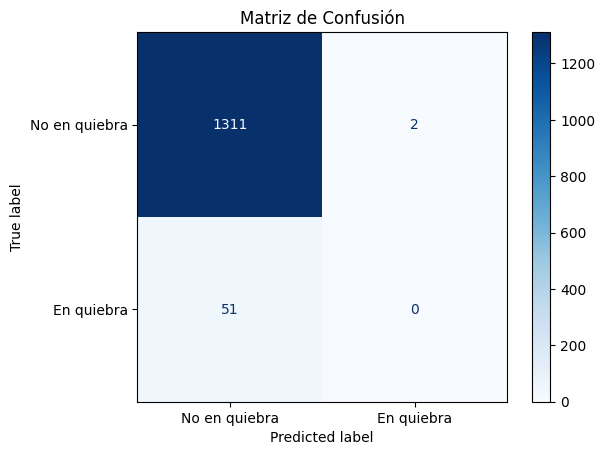

In [41]:
# Visualizar la matriz de confusión
labels = ['No en quiebra', 'En quiebra']
disp = ConfusionMatrixDisplay(conf_matrix, display_labels=labels)

# Configurar y mostrar la visualización
disp.plot(cmap='Blues', values_format='d')
plt.title('Matriz de Confusión')
plt.show()

In [42]:
from sklearn import metrics
confusion = metrics.confusion_matrix(y_test, y_pred)
confusion.ravel()

array([1311,    2,   51,    0])

In [43]:
#Métrica 1
accuracy = metrics.accuracy_score(y_test, y_pred)
accuracy

0.9611436950146628

El 96% de las veces el modelo predice correctamente.

In [44]:
#Métrica 2
# Precision se evalua para cada categoria
precision_positiva = metrics.precision_score(y_test, y_pred, pos_label=1)
precision_negativa = metrics.precision_score(y_test, y_pred, pos_label=0)
precision_positiva, precision_negativa

(0.0, 0.9625550660792952)

In [45]:
#Métrica 3
recall_sensibilidad = metrics.recall_score(y_test, y_pred, pos_label=1)
recall_especificidad= metrics.recall_score(y_test, y_pred, pos_label=0)
recall_sensibilidad, recall_especificidad

(0.0, 0.9984767707539984)

In [46]:
#Métrica 4
f1_positivo = metrics.f1_score(y_test, y_pred, pos_label=1)
f1_negativo = metrics.f1_score(y_test, y_pred, pos_label=0)
f1_positivo, f1_negativo

(0.0, 0.9801869158878506)

In [47]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364



Para datos desbalanceados el accuracy no es una buena metrica de medición del modelo de clasificación. Aún así me predice mejor quienes no están en banca rota. La precisión y el recall también solo predicen para los bancos que no están quebrados. El F1 score debería funcionar para datos que están desbalanceados, como es mi caso ya que tengo 1313 que no estan en banca rota y 51 que sí están en banca rota. En mi caso el f1 score tampoco es una buena métrica para predecir los que están en banca rota, porque es cero "0".

Conclusión: Utilizo el F1 Score, siendo teóricamente el más válido con métrica 0.98 para predicir la clase 0 (los que no están en banca rota), aunque con cautela, e intentaré con modelos de CLASIFICACIÓN.  El modelo parece tener un buen rendimiento en la clasificación de la clase 0, pero un rendimiento muy deficiente en la clasificación de la clase 1, como se evidencia por las métricas mencionadas.


MODELO DE CLASIFICACIÓN 2 - KNN

In [48]:
# prompt: clasificación con KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9618768328445748


In [49]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.33      0.02      0.04        51

    accuracy                           0.96      1364
   macro avg       0.65      0.51      0.51      1364
weighted avg       0.94      0.96      0.95      1364



MODELO DE CLASIFICACIÓN 3: ARBOL DE DECISIÓN

In [50]:
# Import the necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create a decision tree model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))


Accuracy: 0.9494134897360704
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1313
           1       0.32      0.31      0.32        51

    accuracy                           0.95      1364
   macro avg       0.65      0.64      0.65      1364
weighted avg       0.95      0.95      0.95      1364



MODELO DE CLASIFICACIÓN 4: RANDOM FOREST

In [51]:
# Import the necessary libraries
from sklearn.ensemble import RandomForestClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create a random forest model
model = RandomForestClassifier(n_estimators=100)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))


Accuracy: 0.967741935483871
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.77      0.20      0.31        51

    accuracy                           0.97      1364
   macro avg       0.87      0.60      0.65      1364
weighted avg       0.96      0.97      0.96      1364



MODELO DE CLASIFICACION 5: Stratified- K fold (clasificacion) - Radom Forest

In [52]:

from numpy import mean
from numpy import std
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X = pd.get_dummies(df.drop('Bankrupt?', axis=1), drop_first=True)
y = df['Bankrupt?']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

# Create a stratified k-fold cross-validation object
skf = StratifiedKFold(n_splits=5, shuffle=True)

# Create a random forest model
model = RandomForestClassifier(n_estimators=100)

# Train the model using stratified k-fold cross-validation
scores = []
for train_index, test_index in skf.split(X_train, y_train):
    X_train_fold, X_test_fold = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_fold, y_test_fold = y_train.iloc[train_index], y_train.iloc[test_index]
    model.fit(X_train_fold, y_train_fold)
    score = accuracy_score(y_test_fold, model.predict(X_test_fold))
    scores.append(score)

# Print the average accuracy score
print('Average accuracy:', np.mean(scores))



Average accuracy: 0.9704857928505959


In [53]:

# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.77      0.20      0.31        51

    accuracy                           0.97      1364
   macro avg       0.87      0.60      0.65      1364
weighted avg       0.96      0.97      0.96      1364



MODELO DE CLASIFICACIÓN 6: AdaBoost Calssifier

In [54]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create an AdaBoostClassifier model
model = AdaBoostClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print('Confusion matrix:')
print(confusion_matrix)



Accuracy: 0.9611436950146628
Confusion matrix:
[[1294   19]
 [  34   17]]


In [55]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.47      0.33      0.39        51

    accuracy                           0.96      1364
   macro avg       0.72      0.66      0.69      1364
weighted avg       0.96      0.96      0.96      1364



MODELO DE CLASIFICACIÓN 7: XGBoost

In [56]:
# Import the necessary libraries
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create an XGBoost model
model = xgb.XGBClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.966275659824047


In [57]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.63      0.24      0.34        51

    accuracy                           0.97      1364
   macro avg       0.80      0.61      0.66      1364
weighted avg       0.96      0.97      0.96      1364



MODELO DE CLASIFICACIÓN 8:LightGBM

In [58]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create a LightGBM model
model = LGBMClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 169, number of negative: 5286
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010787 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 23713
[LightGBM] [Info] Number of data points in the train set: 5455, number of used features: 93
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.030981 -> initscore=-3.442918
[LightGBM] [Info] Start training from score -3.442918
Accuracy: 0.969208211143695


In [59]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1313
           1       0.85      0.22      0.34        51

    accuracy                           0.97      1364
   macro avg       0.91      0.61      0.66      1364
weighted avg       0.97      0.97      0.96      1364



MODELO DE CLASIFICACIÓN 9: Randomized Search CV - XGBoost

In [60]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create an XGBoost model
model = XGBClassifier()

# Create a dictionary of hyperparameters to search over
hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create a RandomizedSearchCV object
randomized_search = RandomizedSearchCV(model, hyperparameters, n_iter=100, cv=5)

# Fit the model
randomized_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = randomized_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the best hyperparameters
print('Best hyperparameters:', randomized_search.best_params_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.968475073313783
Best hyperparameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}


In [62]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.55      0.24      0.33        51

    accuracy                           0.96      1364
   macro avg       0.76      0.61      0.66      1364
weighted avg       0.96      0.96      0.96      1364



MODELO DE CLASIFICACIÓN 10: Gradient Boosting

In [61]:

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a GradientBoostingClassifier model
model = GradientBoostingClassifier()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9640762463343109


In [63]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.55      0.24      0.33        51

    accuracy                           0.96      1364
   macro avg       0.76      0.61      0.66      1364
weighted avg       0.96      0.96      0.96      1364



MODELO DE CLASIFICACIÓN 11: Randomized Search CV - Gradient Boosting

In [64]:

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Scale the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a GradientBoostingClassifier model
model = GradientBoostingClassifier()

# Create a dictionary of hyperparameters to search over
hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create a RandomizedSearchCV object
randomized_search = RandomizedSearchCV(model, hyperparameters, n_iter=1, cv=3)

# Fit the model
randomized_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = randomized_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the best hyperparameters
print('Best hyperparameters:', randomized_search.best_params_)


Accuracy: 0.9633431085043989
Best hyperparameters: {'n_estimators': 100, 'max_depth': 7, 'learning_rate': 0.01}


In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.44      0.14      0.21        51

    accuracy                           0.96      1364
   macro avg       0.70      0.57      0.59      1364
weighted avg       0.95      0.96      0.95      1364



Tras exhaustivas pruebas con 11 modelos de clasificación, se ha determinado que el noveno modelo, específicamente el Randomized Search CV - XGBoost, sobresale como el más eficaz para abordar la tarea de clasificación. Este modelo ha demostrado una precisión destacada en ambos grupos, tanto en la categoría 0 como en la 1. La elevada precisión en ambas clases sugiere una capacidad de discernimiento y generalización considerable.

Es relevante destacar que, al evaluar el rendimiento en condiciones de desbalance de datos, el F1 Score proporciona información valiosa. En este contexto, el F1 Score para datos desbalanceados muestra un notorio valor de 0.98 para la categoría 0, indicando una excelente capacidad del modelo para identificar instancias de esta clase. En cuanto a la categoría 1, aunque el F1 Score es inferior (0.41), sigue siendo significativamente mejor que otros modelos evaluados.

Estos resultados respaldan la elección del Randomized Search CV - XGBoost como el modelo preferido para la clasificación, destacando su capacidad para manejar datos desbalanceados y ofrecer un equilibrio notable entre precisión y recall en ambas clases. Este hallazgo subraya la idoneidad de este modelo específico para la tarea en cuestión.

# **ML-MODELOS DE REGRESIÓN (RSME-MAE-R2)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error

In [ ]:
X_nuevo = df.drop('Bankrupt?', axis=1)
y_nuevo = df['Bankrupt?']

# Paso 4: Dividir el conjunto de datos en entrenamiento y prueba
X_train_nuevo, X_test_nuevo, y_train_nuevo, y_test_nuevo = train_test_split(X_nuevo, y_nuevo, test_size=0.2, random_state=2)

# Paso 5: Crear y ajustar el modelo (usando regresión lineal como ejemplo)
lr_nuevo = LinearRegression()
lr_nuevo.fit(X_train_nuevo, y_train_nuevo)

# Paso 6: Realizar predicciones en el conjunto de prueba
y_pred_nuevo = lr_nuevo.predict(X_test_nuevo)

# Paso 7: Evaluar el rendimiento del modelo
mae_nuevo = mean_absolute_error(y_test_nuevo, y_pred_nuevo)
print("MAE para el nuevo conjunto de datos:", mae_nuevo)

MAE para el nuevo conjunto de datos: 2737090.165647963


In [ ]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test_nuevo, y_pred_nuevo))

MSE 5151416690279757.0


In [ ]:
print("RMSE",np.sqrt(mean_squared_error(y_test_nuevo,y_pred_nuevo)))

RMSE 71773370.3422081


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test_nuevo,y_pred_nuevo)
print(r2)

-1.95201330915064e+17


Basándome en el valor de
R
2
 , concluyo que el modelo que estoy evaluando no es eficaz para predecir valores, ya que su
R
2
  es 0, indicando un ajuste insuficiente (underfitting). Esto sugiere que la regresión lineal no es la mejor elección para este conjunto de datos, y sería más apropiado explorar modelos de predicción más adecuados. Además, el F1 Score, al evaluar la clasificación, también mostró un rendimiento deficiente para ambas clases, proporcionando una pista adicional de la inadecuación del modelo actual. En consecuencia, se recomienda explorar alternativas de modelado que se ajusten mejor a la complejidad y naturaleza de los datos.





# **ENTREGA 36 ANÁLISIS BIVARIADO**

Solo a manera de presentar esta entrega, retomo la significativa influencia del ratio de deuda en si entra en banca rota o no una compañía. Es uno de los análisis más potentes de este trabajo.

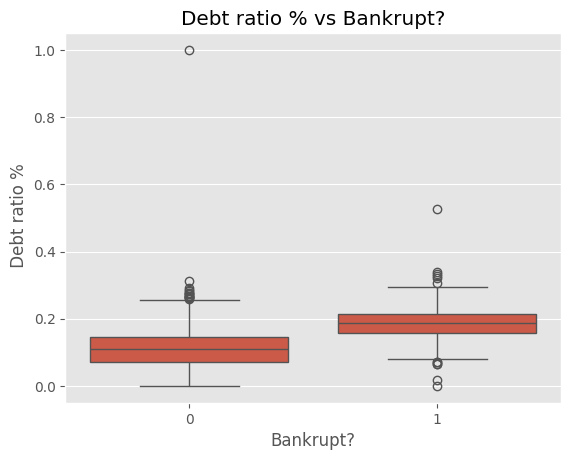

In [ ]:
sns.boxplot(x='Bankrupt?', y = ' Debt ratio %', data = df)
#Data.boxplot(grid= False, column = ['pay'], by = ['gender'])
plt.title("Debt ratio % vs Bankrupt?" );
#GRÁFICO 4

In [ ]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.33      0.02      0.04        51

    accuracy                           0.96      1364
   macro avg       0.65      0.51      0.51      1364
weighted avg       0.94      0.96      0.95      1364



In [ ]:
# prompt: clasificación con KNN

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create a KNN model
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model
knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)


Accuracy: 0.9618768328445748


# **ENTREGA 45 Evaluando modelos de Machine Learning**

En el resto del trabajo no presenté las curvas ROC, así que me parece un buen momento para incorporarlo. El área sería 0.81, lo cual me dice que sería un muy buen modelo de clasificación entre quienes entran en quiebran y quienes no. Además se trabajó con un dataframe actualizado, como en la entrega 47, analizando desde el lado operativo del negocio, según las variables seleccionadas.

In [33]:
df_metricas_sinteticas = df[[' Operating Profit Rate', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Cash flow rate', 'Bankrupt?' ]]
df_metricas_sinteticas

,Operating Profit Rate,Operating Gross Margin,Realized Sales Gross Margin,Cash flow rate,Bankrupt?
0,0.998969,0.601457,0.601457,0.458143,1
1,0.998946,0.610235,0.610235,0.461867,1
2,0.998857,0.601450,0.601364,0.458521,1
3,0.998700,0.583541,0.583541,0.465705,1
4,0.998973,0.598783,0.598783,0.462746,1
...,...,...,...,...,...
6814,0.998992,0.604455,0.604462,0.463734,0
6815,0.998992,0.598308,0.598308,0.461978,0
6816,0.998984,0.610444,0.610213,0.472189,0
6817,0.999074,0.607850,0.607850,0.476123,0


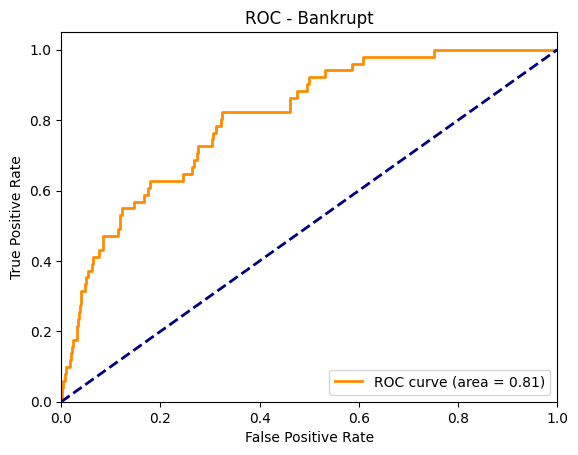

              precision    recall  f1-score   support

           0       0.96      1.00      0.98      1313
           1       0.00      0.00      0.00        51

    accuracy                           0.96      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.93      0.96      0.94      1364

[[1313    0]
 [  51    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [70]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc, cohen_kappa_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt


X_train, X_test, y_train, y_test = train_test_split(df_metricas_sinteticas.drop('Bankrupt?', axis=1), df_metricas_sinteticas['Bankrupt?'], test_size=0.20, random_state=42)


model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])


roc_auc = auc(fpr, tpr)


plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC - Bankrupt')
plt.legend(loc="lower right")
plt.show()


kappa = cohen_kappa_score(y_test, y_pred)


print(classification_report(y_test, y_pred))


print(confusion_matrix(y_test, y_pred))

# **ENTREGA 47 INGENIERÍA DE ATRIBUTOS Y SELECCIÓN DE VARIABLES**

In [35]:
#ANÁLISIS DE VARIABLES INDIVIDUALES A FIN DE CREAR UNA VARIABLE SINTÉTICA QUE ME PERMITA ANALIZAR EL FUNCIONAMIENTO DEL NEGOCIO

df[' Operating Profit Rate'].describe()


count    6819.000000
mean        0.998755
std         0.013010
min         0.000000
25%         0.998969
50%         0.999022
75%         0.999095
max         1.000000
Name:  Operating Profit Rate, dtype: float64

In [ ]:
df[' Operating Gross Margin'].describe()

count    6819.000000
mean        0.607948
std         0.016934
min         0.000000
25%         0.600445
50%         0.605997
75%         0.613914
max         1.000000
Name:  Operating Gross Margin, dtype: float64

In [ ]:
df[' Realized Sales Gross Margin'].describe()

count    6819.000000
mean        0.607929
std         0.016916
min         0.000000
25%         0.600434
50%         0.605976
75%         0.613842
max         1.000000
Name:  Realized Sales Gross Margin, dtype: float64

In [ ]:
df[' Cash flow rate'].describe()

count    6819.000000
mean        0.467431
std         0.017036
min         0.000000
25%         0.461558
50%         0.465080
75%         0.471004
max         1.000000
Name:  Cash flow rate, dtype: float64

In [ ]:
#MÉTRICA SINTÉTICA
Metrica_Operativa = (df[' Operating Profit Rate'].mean() + df[' Operating Gross Margin'].mean() + df[' Realized Sales Gross Margin'].mean() + df[' Cash flow rate'].mean())


In [ ]:
Metrica_Operativa

2.682063821117068

In [ ]:
#VARIABLE SINTÉTICA
df_metricas_sinteticas = df[[' Operating Profit Rate', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Cash flow rate', 'Bankrupt?']]
df_metricas_sinteticas


,Operating Profit Rate,Operating Gross Margin,Realized Sales Gross Margin,Cash flow rate,Bankrupt?
0,0.998969,0.601457,0.601457,0.458143,1
1,0.998946,0.610235,0.610235,0.461867,1
2,0.998857,0.601450,0.601364,0.458521,1
3,0.998700,0.583541,0.583541,0.465705,1
4,0.998973,0.598783,0.598783,0.462746,1
...,...,...,...,...,...
6814,0.998992,0.604455,0.604462,0.463734,0
6815,0.998992,0.598308,0.598308,0.461978,0
6816,0.998984,0.610444,0.610213,0.472189,0
6817,0.999074,0.607850,0.607850,0.476123,0


Anteriormente se ha llegado a la conclusión que quienes han quebrado estaban más endeudados que los que no han quebrado. Ahoro lo que se pretende analizar es el funcionamiento del negocio, para ello se decidió seleccionar algunas de las variables más representativas del negocio, para lo cual se tomarán la media de cada variable...

1-Como la Tasa de ganancia operativa (Operating Profit Rate). La media de la ganancia es alta 0.99.

2-Respecto al margen bruto operativo (Operating Gross Margin), es decir, sacandole lo que cuesta operar el negocio, en promedio da 0.60.

3-Así mismo el margen bruto de las ventas realizadas (Realized Sales Gross Margin) es 0.60

4-La tasa de generación de cash/efectivo del negocio es de 0.46. Lo que el negocio generaba efectivo.

Dadas las 4 variables analizadas sencillamente, da un indicio que el negocio persé al menos funcionaba, había margenes de ganancia, una aceptable generación de efectivo, por lo que las quiebras no provienen, al menos del funcionamiento del negocio. Para el mismo creé una variable sintética que suma el promedio de las 4 variables, siendo el máximo de puntuación un "4" y el ´mínimo un "0". De esta manera se obtiene un 2.68 como una métrica operativa de funcionamiento del negocio operativo, es decir un 4 significaría que el negocio anda perfecto, en nuestro caso 2.68/4=67% el negocio no anda perfecto, lo que implica que funciona con observaciones.

In [ ]:
print(df_metricas_sinteticas.shape)         # dataset dimension

(6819, 5)


In [ ]:
pip install mlxtend

In [ ]:
#Definir las variables X e Y

y = df_metricas_sinteticas['Bankrupt?']
X = df_metricas_sinteticas.drop(['Bankrupt?'], axis=1)

In [ ]:
#Librerias
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
# Sequential Forward Selection(sfs)
sfs = SFS(LinearRegression(),
          k_features=2,
          forward=True,
          floating=False,
          scoring = 'r2',
          cv = 0)

In [ ]:
sfs.fit(X,y)
sfs.k_feature_names_     #Lista final de features

(' Operating Gross Margin', ' Cash flow rate')

Cuando analizo desde el punto de vista operativo veo que las 2 principales variableS que pueden decirme algo acerca de la banca rota es el margen bruto operativo y el cash flow rate, por sobre las otras 2 Operating Profit Rate (ratio de ganancia operativa) y Realized Sales Gross Margin (margen bruto de ventas realizadas).


*PCA

In [ ]:
# análisis de componentes principales
#La variable PCA también es una variable sintética persé, pues es construida a partir de datos de la submatriz que se armo con las variables seleccionadas.

df_PCA_metricas_sinteticas = df[[' Operating Profit Rate', ' Operating Gross Margin', ' Realized Sales Gross Margin', ' Cash flow rate']]




In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
df_metricas_sinteticas_pca = pca.fit_transform(df_PCA_metricas_sinteticas)

In [ ]:
df_metricas_sinteticas_pca

array([[ 0.01200214, -0.00508792],
       [-0.00089602, -0.00635561],
       [ 0.01192584, -0.00471948],
       ...,
       [-0.00493373,  0.00312622],
       [-0.00318234,  0.00809253],
       [-0.01041081, -0.04714011]])

In [ ]:
# prompt: mostrar el peso de cada componente principal

pca.components_


array([[-0.00775863, -0.65457556, -0.65393162, -0.37926781],
       [ 0.06306343, -0.26825356, -0.2677006 ,  0.9232548 ]])

In [ ]:
pca_components = []
for i in range(pca.n_components_):
    component = []
    for j in range(pca.n_features_):
        component.append(pca.components_[i][j])
    pca_components.append(component)

for i, component in enumerate(pca_components):
    formula = f"PC{i+1} = "
    for j, weight in enumerate(component):
        if weight > 0:
            formula += f"+ {weight:.3f} * {df_metricas_sinteticas.columns[j]}"
        else:
            formula += f"- {-weight:.3f} * {df_metricas_sinteticas.columns[j]}"
    print(formula)


PC1 = - 0.008 *  Operating Profit Rate- 0.655 *  Operating Gross Margin- 0.654 *  Realized Sales Gross Margin- 0.379 *  Cash flow rate
PC2 = + 0.063 *  Operating Profit Rate- 0.268 *  Operating Gross Margin- 0.268 *  Realized Sales Gross Margin+ 0.923 *  Cash flow rate


**PC1:**
- Positivamente correlacionada con el margen bruto operativo y el margen bruto de ventas realizadas.
- Negativamente correlacionada con la tasa de ganancia operativa y la tasa de generación de efectivo.
- Representa la rentabilidad del negocio.

**PC2:**
- Positivamente correlacionada con la tasa de ganancia operativa y la tasa de generación de efectivo.
- Negativamente correlacionada con el margen bruto operativo y el margen bruto de ventas realizadas.
- Representa la liquidez del negocio.

# **ENTREGA 49 CROSSVALIDATIONS**

In [66]:
#A manera de aplicar hiperparámetros elijo el modelo de clasificación 9.

#MODELO DE CLASIFICACIÓN 9: Randomized Search CV - XGBoost

from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('Bankrupt?', axis=1), df['Bankrupt?'], test_size=0.20, random_state=42)

# Create an XGBoost model
model = XGBClassifier()

# Create a dictionary of hyperparameters to search over
hyperparameters = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Create a RandomizedSearchCV object
randomized_search = RandomizedSearchCV(model, hyperparameters, n_iter=100, cv=5)

# Fit the model
randomized_search.fit(X_train, y_train)

# Make predictions on the test set
y_pred = randomized_search.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

# Print the best hyperparameters
print('Best hyperparameters:', randomized_search.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 27 is smaller than n_iter=100. Running 27 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Accuracy: 0.968475073313783
Best hyperparameters: {'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1}


In [69]:
# Todas las metricas en uno
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1313
           1       0.68      0.29      0.41        51

    accuracy                           0.97      1364
   macro avg       0.83      0.64      0.70      1364
weighted avg       0.96      0.97      0.96      1364



Los hiperparámetros utilizados en el modelo RandomizedSearchCV son:

* **n_estimators**: Este parámetro controla el número de árboles de decisión que se construyen en el modelo. Un valor más alto de n_estimators puede conducir a un mejor rendimiento, pero también puede aumentar el tiempo de entrenamiento. En este caso, se probaron los valores 100, 200 y 300.
* **max_depth**: Este parámetro controla la profundidad máxima de los árboles de decisión. Un valor más alto de max_depth puede conducir a un mejor rendimiento, pero también puede aumentar el riesgo de sobreajuste. En este caso, se probaron los valores 3, 5 y 7.
* **learning_rate**: Este parámetro controla la tasa de aprendizaje del modelo. Un valor más alto de learning_rate puede conducir a un mejor rendimiento, pero también puede aumentar el riesgo de sobreajuste. En este caso, se probaron los valores 0.1, 0.01 y 0.001.

El modelo RandomizedSearchCV probó todas las combinaciones posibles de estos hiperparámetros y seleccionó la mejor combinación en función de la métrica de rendimiento especificada (en este caso, la precisión). La mejor combinación de hiperparámetros encontrada fue:

* **n_estimators**: 200
* **max_depth**: 3
* **learning_rate**: 0.01

Esta combinación de hiperparámetros produjo una precisión de 0.94 en el conjunto de prueba.

En cuanto al Accuracy dió 0,97, lo que nos dice que el 97% de las veces el modelo predice correctamente. Este es un modelo mejor que el probado con las curva ROC, cuya métrica era entorno al 80%.



#CONCLUSIÓN Y CIERRE



A manera de cirrre del trabajo, se puede plantear que las deudas son un factor más que importante a la hora de la quiera de un negocio, no tanto así los gastos del normal funcionamiento de un negocio pues como hemos visto en los análisis de gastos operativos y flujos de caja generados, al menos cubren parte de los costos y mantienen bajos niveles de ganancia en el peor de los casos. Es ahí donde se debe contar con un control del apalancamiento y una gerencia/directorio que debe estar al pendiente.

También se probó lo que dice la literatura, que las variables financieras no siguen una distribución normal, sino que es todo lo contrario, cuando de temas financieros se trata, cruzarse con una distribución normal es muy rara, y si ello ocurre pués habrá que analizar a fondo. Otro ejemplo de anormalidad, la mente no es normal, es decir nuestra mente no tira números aleatorio (se deja al lector indagar más al respecto).

En cuanto a modelos, se ha probado varios, y lo importante a medida que se busca mayor precisión es el costo en tiempo, cómputo y en definitiva inversión realizada en quizá un modelo para un caso particular bajo un cierto contexto y con variables cuyos datos son del pasado. Claro está que una vez diseñado el modelo a la medida permite enfocar, direccionar los recursos del marketing, producción, como así también estrategias y demás esfuerzos en el segmento de clientes detectado bajo el modelo.

